In [242]:
#from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoLarsCV
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

#SettingWithCopyWarning
#pd.options.mode.chained_assignment = None  # default='warn'

%matplotlib inline

In [243]:
#Load the dataset
data = pd.read_csv('tree_addhealth.csv')

In [244]:
#upper-case all DataFrame column names
data.columns = map(str.upper, data.columns)

In [245]:
# Data Management
data_clean_na = data.dropna()
recode1 = {1:1, 2:0}
data_clean['MALE'] = data_clean_na['BIO_SEX'].map(recode1)
#= data_clean.loc[indexer, :]
data_clean.head()

,BIO_SEX,HISPANIC,WHITE,BLACK,NAMERICAN,ASIAN,AGE,TREG1,ALCEVR1,ALCPROBS1,...,VIOL1,PASSIST,DEVIANT1,SCHCONN1,GPA1,EXPEL1,FAMCONCT,PARACTV,PARPRES,MALE
1,2.0,0.0,0.0,1.0,0.0,0.0,19.427397,1.0,1.0,1,...,1.0,0,5.0,22.0,2.333333,0.0,23.3,9.0,15.0,0
3,1.0,0.0,0.0,1.0,0.0,0.0,20.430137,1.0,0.0,0,...,4.0,1,4.0,19.0,2.000000,0.0,18.7,6.0,14.0,1
5,1.0,0.0,0.0,1.0,0.0,0.0,14.509589,0.0,0.0,0,...,3.0,0,0.0,27.0,2.666667,0.0,23.7,3.0,13.0,1
6,1.0,0.0,0.0,1.0,0.0,0.0,13.676712,0.0,0.0,0,...,5.0,0,7.0,18.0,2.500000,0.0,24.7,6.0,13.0,1
7,1.0,0.0,1.0,0.0,0.0,0.0,15.178082,1.0,1.0,0,...,8.0,1,6.0,20.0,1.500000,0.0,22.3,10.0,14.0,1


In [246]:
#select predictor variables and target variable as separate data sets  
predvar= data_clean[['MALE','HISPANIC','WHITE','BLACK','NAMERICAN','ASIAN',
'AGE','ALCEVR1','ALCPROBS1','MAREVER1','COCEVER1','INHEVER1','CIGAVAIL','DEP1',
'ESTEEM1','VIOL1','PASSIST','DEVIANT1','GPA1','EXPEL1','FAMCONCT','PARACTV',
'PARPRES']]

#predvar= data_clean[['MALE']]

In [247]:
target = data_clean.SCHCONN1
len(data_clean.columns)

26

In [248]:
predictors=predvar.copy()

In [249]:
def encode_data_frame(df):
    from collections import defaultdict
    d = defaultdict(preprocessing.StandardScaler)

    # Encoding the variable
    fit = df.apply(lambda x: d[x.name].fit_transform(x.astype('float64')))
    # Inverse the encoded
    fit.apply(lambda x: d[x.name].inverse_transform(x))
#np.array(temp).reshape((len(temp), 1))
    # Using the dictionary to label future data
    df_fit = df.apply(lambda x: d[x.name].transform(x)).copy()

    return df_fit

In [253]:
scaler = preprocessing.StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(predictors), columns=predictors.columns)
df_scaled.describe()



,MALE,HISPANIC,WHITE,BLACK,NAMERICAN,ASIAN,AGE,ALCEVR1,ALCPROBS1,MAREVER1,...,DEP1,ESTEEM1,VIOL1,PASSIST,DEVIANT1,GPA1,EXPEL1,FAMCONCT,PARACTV,PARPRES
count,4.575000e+03,4.575000e+03,4.575000e+03,4.575000e+03,4.575000e+03,4.575000e+03,4.575000e+03,4.575000e+03,4.575000e+03,4.575000e+03,...,4.575000e+03,4.575000e+03,4.575000e+03,4.575000e+03,4.575000e+03,4.575000e+03,4.575000e+03,4.575000e+03,4.575000e+03,4.575000e+03
mean,-7.377220e-17,-3.766265e-17,-2.484958e-17,4.659297e-17,-1.087169e-17,-2.950888e-17,-1.469232e-15,-8.386734e-17,-3.106198e-18,-2.484958e-17,...,-1.304603e-16,3.665313e-16,1.553099e-17,1.669581e-17,3.261508e-17,-7.765494e-19,3.106198e-18,-4.659297e-18,-7.920804e-17,1.638519e-16
std,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,...,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00
min,-9.586676e-01,-3.534230e-01,-1.468792e+00,-5.558893e-01,-1.940368e-01,-2.052833e-01,-2.458975e+00,-1.056455e+00,-4.125615e-01,-5.649816e-01,...,-1.299333e+00,-4.265521e+00,-6.242240e-01,-3.379691e-01,-7.513921e-01,-2.357728e+00,-2.047044e-01,-6.223275e+00,-1.872318e+00,-4.985609e+00
25%,-9.586676e-01,-3.534230e-01,-1.468792e+00,-5.558893e-01,-1.940368e-01,-2.052833e-01,-7.978438e-01,-1.056455e+00,-4.125615e-01,-5.649816e-01,...,-6.905356e-01,-5.486365e-01,-6.242240e-01,-3.379691e-01,-7.513921e-01,-7.345267e-01,-2.047044e-01,-3.329768e-01,-6.817892e-01,-6.703234e-01
50%,-9.586676e-01,-3.534230e-01,6.808316e-01,-5.558893e-01,-1.940368e-01,-2.052833e-01,1.065532e-02,9.465623e-01,-4.125615e-01,-5.649816e-01,...,-2.339378e-01,-1.769481e-01,-6.242240e-01,-3.379691e-01,-4.673149e-01,-8.524616e-02,-2.047044e-01,4.319970e-01,-8.652477e-02,2.886289e-01
75%,1.043114e+00,-3.534230e-01,6.808316e-01,-5.558893e-01,-1.940368e-01,-2.052833e-01,7.644310e-01,9.465623e-01,-4.125615e-01,-5.649816e-01,...,5.270586e-01,7.522730e-01,1.470994e-01,-3.379691e-01,3.849169e-01,8.886746e-01,-2.047044e-01,6.614892e-01,8.063718e-01,7.681051e-01
max,1.043114e+00,2.829471e+00,6.808316e-01,1.798919e+00,5.153663e+00,4.871317e+00,3.234061e+00,9.465623e-01,6.292479e+00,1.769969e+00,...,6.006232e+00,1.681494e+00,6.703348e+00,2.958851e+00,6.918694e+00,1.537955e+00,4.885093e+00,9.292300e-01,3.485062e+00,7.681051e-01


In [254]:
# split data into train and test sets
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, target, 
                                                              test_size=.3, random_state=123)

In [255]:
# specify the lasso regression model
model=LassoLarsCV(cv=10, precompute=False).fit(pred_train,tar_train)
# print variable names and regression coefficients
dict(zip(predictors.columns, model.coef_))

{'AGE': 0.1400389348790006,
 'ALCEVR1': -0.65097344274899016,
 'ALCPROBS1': 0.0,
 'ASIAN': 0.95790527542611259,
 'BLACK': -0.69364786863867001,
 'CIGAVAIL': -0.23961314665451061,
 'COCEVER1': -1.1159913912676713,
 'DEP1': -0.13000533943892123,
 'DEVIANT1': -0.11876772287430444,
 'ESTEEM1': 0.20394726609189701,
 'EXPEL1': -0.37577462133024031,
 'FAMCONCT': 0.1970851596565068,
 'GPA1': 0.86429158675908802,
 'HISPANIC': 0.64614255584494762,
 'INHEVER1': 0.0,
 'MALE': -0.43055716488466683,
 'MAREVER1': -0.37313396029183965,
 'NAMERICAN': -0.57672660229351302,
 'PARACTV': 0.089263447554574951,
 'PARPRES': 0.0,
 'PASSIST': 0.0,
 'VIOL1': -0.24654084173128568,
 'WHITE': 0.0}

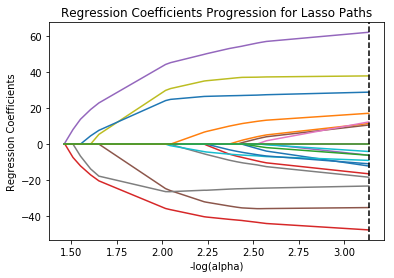

In [256]:
# plot coefficient progression
m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')

In [264]:
model.cv_alphas_.dtype

#Replace zeros from an array with minimum 
model.cv_alphas_[model.cv_alphas_ == 0] = np.min(model.cv_alphas_[np.nonzero(model.cv_alphas_)])

model.cv_alphas_

array([  1.08813163e-06,   1.08813163e-06,   1.03136621e-05,
         1.92381224e-05,   2.95182120e-05,   4.34274496e-05,
         5.88647417e-05,   7.29149396e-05,   7.65311952e-05,
         8.82521054e-05,   1.00673442e-04,   1.34320191e-04,
         1.44050623e-04,   1.59631971e-04,   1.65173089e-04,
         1.71571751e-04,   1.73913663e-04,   1.73993369e-04,
         2.40764574e-04,   2.47827885e-04,   2.66416706e-04,
         2.96226475e-04,   3.25195787e-04,   3.40764773e-04,
         3.69258002e-04,   3.72130677e-04,   4.05913915e-04,
         4.33794120e-04,   4.47034069e-04,   4.56194067e-04,
         5.02025100e-04,   5.02693119e-04,   5.23912155e-04,
         6.20117457e-04,   6.77806379e-04,   6.85774677e-04,
         7.31682708e-04,   7.35498178e-04,   8.42868311e-04,
         8.66744927e-04,   1.00681278e-03,   1.06045318e-03,
         1.10637927e-03,   1.11323626e-03,   1.15698523e-03,
         1.24025978e-03,   1.27163506e-03,   1.32438565e-03,
         1.49849941e-03,

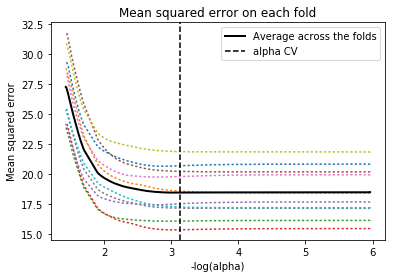

In [265]:
# plot mean square error for each fold
m_log_alphascv = -np.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model.cv_mse_path_, ':')
plt.plot(m_log_alphascv, model.cv_mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')

In [266]:
# MSE from training and test data

train_error = mean_squared_error(tar_train, model.predict(pred_train))
test_error = mean_squared_error(tar_test, model.predict(pred_test))
print('Data MSE training: {} and test: {}'.format(train_error, test_error))

Data MSE training: 18.14857266408148 and test: 17.292517427169468


In [267]:
# R-square from training and test data
rsquared_train=model.score(pred_train,tar_train)
rsquared_test=model.score(pred_test,tar_test)

print('R-square training: {} and test: {}'.format(rsquared_train, rsquared_test))

R-square training: 0.3336111369269187 and test: 0.31001113416000825
